<a href="https://colab.research.google.com/github/Mariana2079/Sistemas-inteligentes/blob/main/T6_inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import pyplot as plt 
from google.colab import files

data = pd.read_csv('dataset.csv') 

In [ ]:

x1 = data["platelets"].to_numpy()
x2 = data["creatinine_phosphokinase"].to_numpy()


In [ ]:
np.histogram(x1)

(array([ 2,  4, 11, 18, 26, 14, 11,  8,  3,  3]),
 array([ 47000.,  92000., 137000., 182000., 227000., 272000., 317000.,
        362000., 407000., 452000., 497000.]))

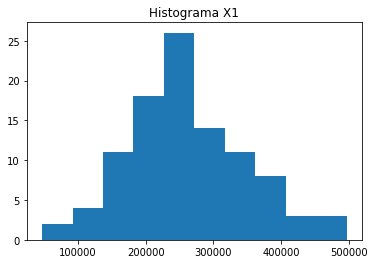

In [ ]:
plt.hist(x1,bins=10) 
plt.title("Histograma X1") 
plt.show()

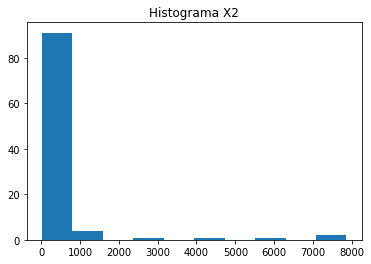

In [ ]:
plt.hist(x2,bins=10) 
plt.title("Histograma X2") 
plt.show()

In [ ]:
print("Media x1")
mediaX1= np.mean(x1)
print(mediaX1)
print("Media x2")
mediaX2= np.mean(x2)
print(mediaX2)
print("Desvio x1")
desvioX1 = np.std(x1)
print(desvioX1)
print("Desvio x2")
desvioX2 = np.std(x2)
print(desvioX2)
x = np.arange(-100000,1000000,1)


Media x1
262592.2227
Media x2
549.56
Desvio x1
85513.18760499392
Desvio x2
1273.8001045690019


In [ ]:
stack = np.stack((stats.zscore(x2),stats.zscore(x1)))
stack = np.stack((x1,x2),axis=0)
Sigma = np.cov(stack)
print('Array médias')
mu = np.array([mediaX1,mediaX2])
print(mu)
print('Sigma (Covariança)')
print(Sigma)

Array médias
[262592.2227    549.56  ]
Sigma (Covariança)
[[7.38636894e+09 7.89021177e+06]
 [7.89021177e+06 1.63895627e+06]]


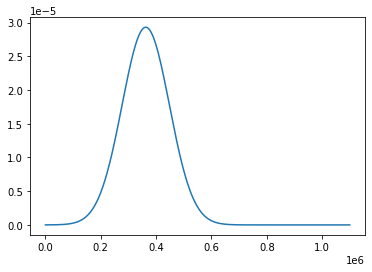

In [ ]:
from matplotlib import pyplot as plt 

dados = (1/desvioX1*np.sqrt(2*np.pi))*np.exp((-1/2)*(np.power(((x-mediaX1)/desvioX1),2)))
plt.plot(dados)

In [ ]:
def multivariate_normal(X, Y, d, mean, covariance):
    pos = np.dstack([X,Y])
    
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

In [ ]:
sX = np.linspace(30000,400000,100)
sY = np.linspace(-1500,6000,100)
sX, sY = np.meshgrid(sX,sY)
Z = multivariate_normal(sX, sY, 2, mu, Sigma)

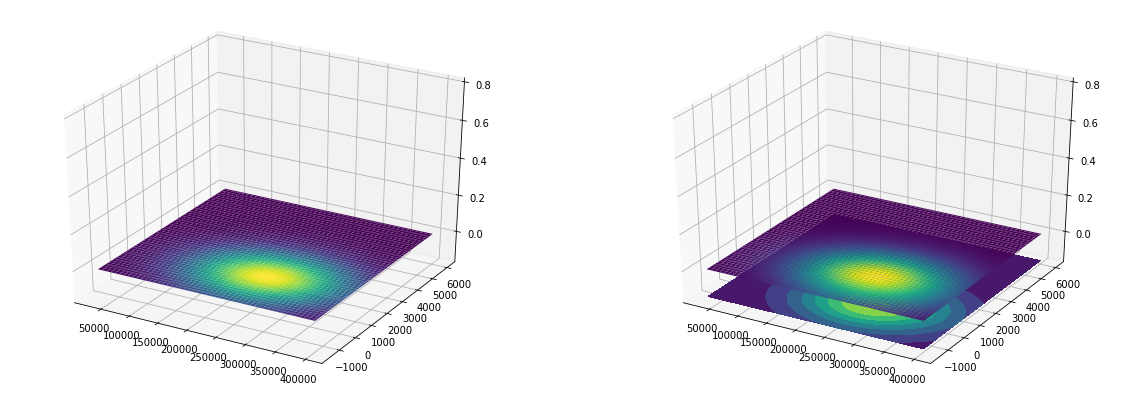

In [ ]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(sX, sY, Z, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.8)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(sX, sY, Z, cmap='viridis')
cset = ax.contourf(sX, sY, Z, zdir='z', offset=-0.15, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.8)

plt.show()

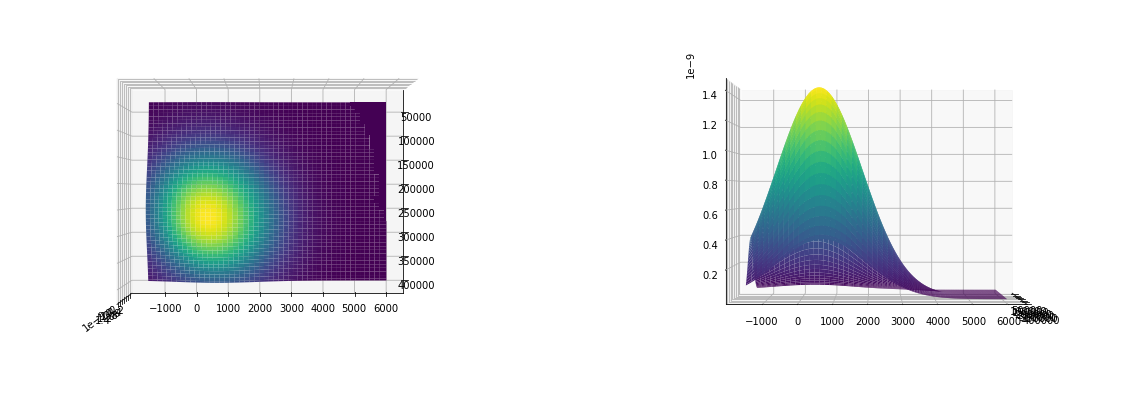

In [ ]:
fig = plt.figure(figsize=(20,7))

# Figure 1
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(sX, sY, Z, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.view_init(90, 2)

# Figure 2
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(sX, sY, Z, cmap='viridis')

# Adjust the limits, ticks and view angle
ax.view_init(0, 0)

plt.show()
     
